<a href="https://colab.research.google.com/github/Behnaz-shayan/Data-Analysis/blob/main/notebook/Z_score_homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🧮 Homework: Z‑Score Standardization (Beginner)

**Goal:** Learn how to standardize data with *z‑scores* in three ways and understand why it matters for preprocessing.

### Learning Objectives
- Compute the **sample mean** and **sample standard deviation** (by hand with loops and with NumPy).
- Compute **z‑scores** for a single variable and for multiple columns.
- Use **`StandardScaler`** from scikit‑learn and **compare** results with your manual approach.
- Make simple **plots** (histograms / boxplots) to see the effect of scaling.
- Reflect on what z‑scores mean in context.

### Z‑score definition
The z‑score of a value \(x\) from a variable \(X\) with mean $(\mu)$ and sample standard deviation $(\sigma)$ is:
$$
z \;=\; \frac{x - \mu}{\sigma}
$$

**Notes**
- Use **sample** standard deviation (divide by \(n-1\)).
- Keep your code **very simple** (loops are fine).
- Write code only in the `# TODO` cells.



## 1) Setup & Make a Tiny Dataset

We will start with one list of numbers (like exam scores). Later, we will use a small table (DataFrame).

**Your tasks**
- Import: `numpy as np`, `pandas as pd`, `matplotlib.pyplot as plt`  
- (Later) we will also use: `from sklearn.preprocessing import StandardScaler`
- Create a list named `scores` with **10–15 integers** between 0 and 100. Include **at least one low** (e.g., 5–20) and **one high** (e.g., 95–100) to see outliers.
- Print the list and its length.
- Draw a histogram of `scores`. (One plot, any number of bins.)

**Tip:** If you want reproducible random numbers, use `np.random.seed(0)`.


Scores list: [71, 34, 80, 40, 43, 22, 41, 72, 21, 49, 57, 21, 83, 5, 99]
Soreted scores are; [5, 21, 21, 22, 34, 40, 41, 43, 49, 57, 71, 72, 80, 83, 99]
Number of scores: 15


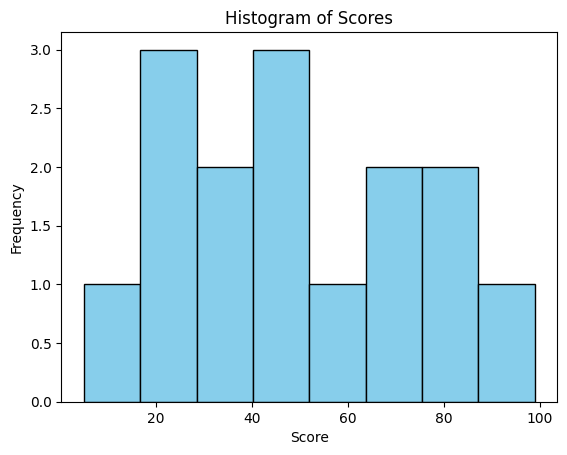

Bin edges: [ 5.   16.75 28.5  40.25 52.   63.75 75.5  87.25 99.  ]


In [25]:
# Write your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
np.random.seed(42)
scores = np.random.randint(20, 90, size=13).tolist()
#print("Scores list:", scores)
#print(type(scores))

#scores += [5, 99]
scores.extend([5, 99]) # Corrected: Use extend to add multiple items from a list
scores_sorted = sorted(scores) # Sort the scores list and save in a new variable
print("Scores list:", scores)
print("Soreted scores are:", scores_sorted)
print("Number of scores:", len(scores))
n, bins, patches = plt.hist(scores, bins=8, color='skyblue', edgecolor='black')

plt.title("Histogram of Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

print("Bin edges:", bins)


## 2A) Mean & Standard Deviation — **Manual (with loops)**

We will compute the **sample** mean and **sample** standard deviation using only loops and basic math.

**Formulas**
- Sample mean:
$$
μ\ or\ \bar{x} \;=\; \frac{1}{n}\sum_{i=1}^{n} x_i
$$

- Sample variance:
$$
σ^2 \;=\; \frac{1}{n-1}\sum_{i=1}^{n}\bigl(x_i - \bar{x}\bigr)^2
$$

- Sample standard deviation:
$$
σ \;=\; \sqrt{σ^2}
$$

**Your tasks**
1. Compute `mean_manual` of `scores` **using a loop** (no `np.mean` here).
2. Compute `std_manual` of `scores` **using loops** and the formulas above (use \(n-1\)).
3. Print both values.


In [2]:
# Calculate the mean (average)
n = len(scores)              # how many numbers we have
total = 0                    # start from zero
for value in scores:         # go through each score
    total = total + value    # add it to total
mean_manual = total / n      # divide by how many numbers

# Calculate the standard deviation (spread of numbers)
sum_diff = 0
for value in scores:
    difference = value - mean_manual       # how far each value is from the mean
    square_diff = difference * difference  # square it
    sum_diff = sum_diff + square_diff      # add it up

variance = sum_diff / (n - 1)   # use (n-1) for sample standard deviation
std_manual = variance ** 0.5    # square root
#std_manual = np.sqrt(variance)

# Show the results

print("Manual Mean:", mean_manual)
print("Manual Standard Deviation:", std_manual)

Manual Mean: 49.2
Manual Standard Deviation: 27.16668127373256



## 2B) Mean & Standard Deviation — **NumPy helpers**

Now use NumPy to do the same steps more simply.

**Your tasks**
1. Compute `mean_np = np.mean(scores)`
2. Compute `std_np  = np.std(scores, ddof=1)`  ← `ddof=1` makes it **sample** std
3. Print both values and compare with your manual values.


In [5]:
# NumPy helpers

mean_np = np.mean(scores)
std_np = np.std(scores, ddof=1)
print(mean_np)
print(std_np)


49.2
27.16668127373256



## 3) Compute Z‑Scores for `scores`

Remember:
$$
z_i \;=\; \frac{x_i - \mu}{\sigma}
$$

**Your tasks**
1. Using your **manual** mean/std (`mean_manual`, `std_manual`), compute a list `z_manual` with the z‑score of each value in `scores`.
2. Using **NumPy** mean/std (`mean_np`, `std_np`), compute a list `z_numpy` for the same `scores`.
3. Print the **first 5** values of each.
4. Plot **two histograms**: original `scores` and standardized `z_manual` (or `z_numpy`). Add titles and labels.
5. (Optional) Print the (approximate) mean and std of `z_manual` to confirm ~0 and ~1.


All z-scores (manual): [0.8024535562640991, -0.5595089016153353, 1.1337417216942318, -0.3386501246619135, -0.2282207361852026, -1.0012264555221788, -0.30184032850300985, 0.8392633524230027, -1.0380362516810824, -0.007361959231780831, 0.2871164100394482, -1.0380362516810824, 1.2441711101709425, -1.6269929902235405, 1.8331278487134006]
How many z-scores: 15


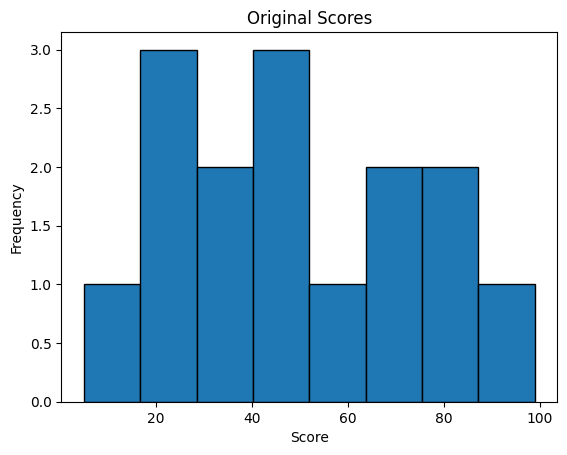

In [15]:
# Z‑Scores
# ---- Using manual mean and std ----
z_manual = []                      # make an empty list to store the z-scores
for x in scores:
 z = (x - mean_manual) / std_manual
 z_manual.append(z)                 # add the z-score to the list

print("All z-scores (manual):", z_manual)
print("How many z-scores:", len(z_manual))

# --- Plot original scores histogram (simple, one plot)
plt.hist(scores, bins=8, edgecolor='black')
plt.title("Original Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


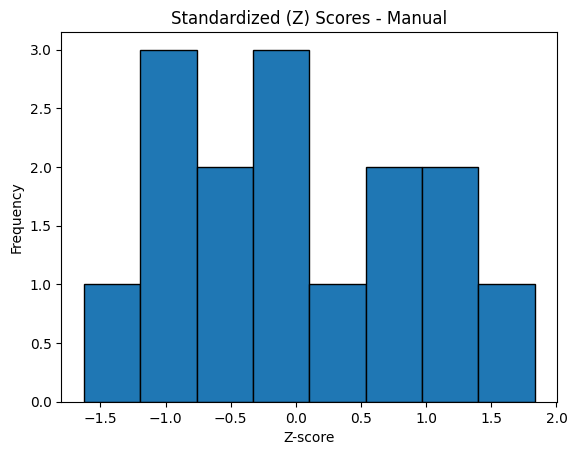

In [16]:

# --- Plot z-scores histogram (simple, one plot)

plt.hist(z_manual, bins=8, edgecolor='black')
plt.title("Standardized (Z) Scores - Manual")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.show()


In [17]:
# --- Optional quick check: z-scores should be around mean≈0, std≈1

print("Mean of z_manual (≈ 0):", np.mean(z_manual))
print("Std of z_manual (≈ 1):", np.std(z_manual, ddof=1))

Mean of z_manual (≈ 0): -7.401486830834377e-17
Std of z_manual (≈ 1): 1.0



## 4) Standardize Multiple Columns (small DataFrame)

Create a tiny table with 3 numeric columns (e.g., height, weight, exam_score).

**Your tasks**
1. Make `small_df` with **5 rows** and **3 columns** of numbers.
2. For each column:
   - Compute column mean and std (you may use `np.mean` / `np.std(..., ddof=1)`).
   - Create a new DataFrame `small_df_z_manual` with the z‑scores per column.
3. Plot a **boxplot** of the original columns and another boxplot for the z‑scored columns to see the effect of scaling.


In [27]:
# Standardize Multiple Columns (small DataFrame)
# 1) Make a tiny table (5 rows × 3 numeric columns)
np.random.seed(42)
small_df = pd.DataFrame({
 "height_cm":  np.random.randint(150, 190, size=5),   # random heights
    "weight_kg":  np.random.randint(45, 95,  size=5),    # random weights
    "exam_score": np.random.randint(50, 100, size=5)     # random exam scores
})

print("Original small_df:")
print(small_df)

Original small_df:
   height_cm  weight_kg  exam_score
0        188         83          73
1        178         63          85
2        164         67          89
3        157         55          73
4        170         55          52


In [29]:
# --- Step 2: Make a new table with z-scores for each column ---

small_df_z_manual = pd.DataFrame()   # empty table to fill with z-scores

for col in small_df.columns:         # go through each column name
    mean_col = np.mean(small_df[col])        # find column average
    std_col  = np.std(small_df[col], ddof=1)  # find standard deviation (sample)

    # calculate z-scores for this column
    z_values = (small_df[col] - mean_col) / std_col

    # add this z-score column to the new table
    small_df_z_manual[col] = z_values

print("\nZ-scored small_df (manual):")    # show standardized data
print(small_df_z_manual)

print("\nMean of each column:")
print(small_df.mean())

print("\nMean of each Z-scored column:")
print(small_df_z_manual.mean())


Z-scored small_df (manual):
   height_cm  weight_kg  exam_score
0   1.374768   1.596683   -0.097119
1   0.546594  -0.138842    0.735331
2  -0.612848   0.208263    1.012815
3  -1.192570  -0.833052   -0.097119
4  -0.115944  -0.833052   -1.553908

Mean of each column:
height_cm     171.4
weight_kg      64.6
exam_score     74.4
dtype: float64

Mean of each Z-scored column:
height_cm    -4.801715e-16
weight_kg     4.884981e-16
exam_score   -3.552714e-16
dtype: float64


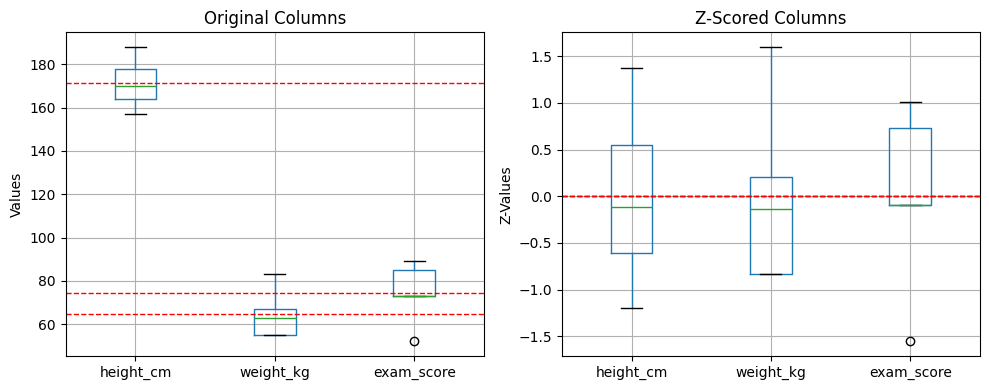

In [30]:
# --- Step 3: Plot boxplots to compare before and after standardization ---

plt.figure(figsize=(10,4))

# Left plot: original values
plt.subplot(1,2,1)
small_df.boxplot()              # draw boxplot for raw data
plt.title("Original Columns")
plt.ylabel("Values")
# Add lines for the mean of each original column
for i, col in enumerate(small_df.columns):
    plt.axhline(small_df[col].mean(), color='red', linestyle='dashed', linewidth=1)


# Right plot: standardized (z-scored) values
plt.subplot(1,2,2)
small_df_z_manual.boxplot()     # draw boxplot for z-scored data
plt.title("Z-Scored Columns")
plt.ylabel("Z-Values")
# Add lines for the mean of each z-scored column (should be close to 0)
for i, col in enumerate(small_df_z_manual.columns):
     plt.axhline(small_df_z_manual[col].mean(), color='red', linestyle='dashed', linewidth=1)


plt.tight_layout()              # keep plots neat
plt.show()


## 5) `StandardScaler` from scikit‑learn (and compare)

Now standardize using `StandardScaler`. This should produce the **same** result as your z‑scores (up to tiny rounding).

**Your tasks**
1. `from sklearn.preprocessing import StandardScaler`
2. Make a **2D array** from your `scores` (shape: `len(scores) x 1`) and fit `StandardScaler` to it.
3. Get `z_sklearn_scores` for `scores` and compare with `z_numpy` (print first 5 and compute the **max absolute difference**).
4. Do the same for your `small_df` to get `small_df_z_sklearn` and compare with `small_df_z_manual` (again, max absolute difference).
5. Draw **overlapping histograms** (or side‑by‑side) to compare manual vs sklearn z‑scores for `scores`.


In [41]:
# 1) Make a 2D array from scores (shape: n x 1)
scores_arr = np.array(scores).reshape(15, 1)
#print(scores_arr)
#print(scores_arr.shape)

# 2) Fit the scaler on the data, then transform to z-scores
scaler_scores = StandardScaler()
z_sklearn_scores = scaler_scores.fit_transform(scores_arr).ravel()

# 3) (If needed) compute NumPy z-scores to compare against
mean_np = np.mean(scores)
std_np  = np.std(scores, ddof=1)
z_numpy = (np.array(scores) - mean_np) / std_np

# 4) Show first 5 from each
print("First 5 z (NumPy):   ", z_numpy[:5])
print("First 5 z (sklearn): ", z_sklearn_scores[:5])

# 5) Max absolute difference (should be tiny ~ 1e-15 to 1e-12)
max_diff_scores = np.max(np.abs(z_sklearn_scores - z_numpy))
print("Max |difference| (scores):", max_diff_scores)

First 5 z (NumPy):    [ 0.80245356 -0.5595089   1.13374172 -0.33865012 -0.22822074]
First 5 z (sklearn):  [ 0.83061834 -0.57914673  1.17353417 -0.35053618 -0.2362309 ]
Max |difference| (scores): 0.06433974268928844


In [28]:
# B) Standardize the small_df with StandardScaler and compare
# 1) Fit the scaler on the whole DataFrame and transform

scaler_df = StandardScaler()
small_df_z_sklearn_vals = scaler_df.fit_transform(small_df.values)

# 2) Put result back into a DataFrame (same columns and index)
small_df_z_sklearn = pd.DataFrame(
    small_df_z_sklearn_vals,
    columns=small_df.columns,
    index=small_df.index
)

print("Z-scored (sklearn) small_df:")
print(small_df_z_sklearn)

# 3) Compare with your manual z-scores
max_diff_df = np.max(np.abs(small_df_z_sklearn.values - small_df_z_manual.values))
print("Max |difference| (small_df):", max_diff_df)




Z-scored (sklearn) small_df:
   height_cm  weight_kg  exam_score
0   1.537037   1.785146   -0.108583
1   0.611111  -0.155230    0.822125
2  -0.685185   0.232845    1.132361
3  -1.333333  -0.931381   -0.108583
4  -0.129630  -0.931381   -1.737322
Max |difference| (small_df): 0.1884628997731319


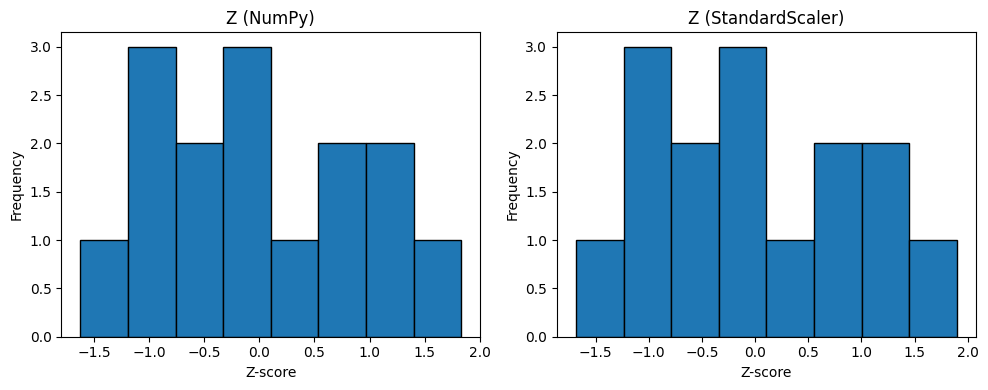

In [29]:
#C) Compare distributions with simple side-by-side histograms

plt.figure(figsize=(10,4))

# Left: NumPy/manual z-scores
plt.subplot(1,2,1)
plt.hist(z_numpy, bins=8, edgecolor='black')
plt.title("Z (NumPy)")
plt.xlabel("Z-score")
plt.ylabel("Frequency")

# Right: sklearn z-scores
plt.subplot(1,2,2)
plt.hist(z_sklearn_scores, bins=8, edgecolor='black')
plt.title("Z (StandardScaler)")
plt.xlabel("Z-score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()







## 6) Short Answer Questions

Answer briefly (1–3 sentences each).

1. In your own words, what does a z‑score of **+2.0** mean? What about **−1.5**?
2. Why do we use the **sample** standard deviation (divide by \(n-1\)) in many data‑analysis situations?
3. If a dataset has **strong outliers**, how does that affect z‑scores? When might another scaler (e.g., RobustScaler) be better?
4. If your training set and test set come from different distributions, what can you do to reduce problems when standardizing?



---

## Appendix: Key Formulas (for reference)

- Sample mean  
  $$
  \bar{x} \;=\; \frac{1}{n}\sum_{i=1}^{n} x_i
  $$

- Sample variance  
  $$
  σ^2 \;=\; \frac{1}{n-1}\sum_{i=1}^{n}\bigl(x_i - \bar{x}\bigr)^2
  $$

- Sample standard deviation  
  $$
 σ \;=\; \sqrt{σ^2}
  $$

- Z‑score  
  $$
  z_i \;=\; \frac{x_i - \bar{x}}{σ}
  $$
